In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.arima_process as smtsa
import statsmodels.tsa.arima_model as smmodel
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.gofplots as gofplots

In [11]:
# Number of samples
n = 600
# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

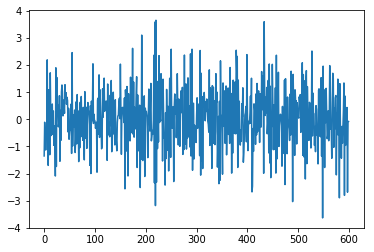

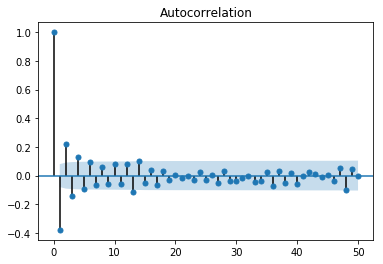

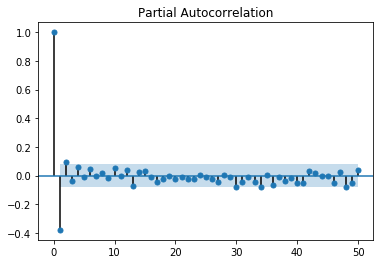

In [12]:
plt.plot(ar1ma1_data)
t1 = tsaplots.plot_acf(ar1ma1_data,lags=50)
t2 = tsaplots.plot_pacf(ar1ma1_data,lags=50)

In [7]:
# Build AR(1) model
ar1ma1 = smmodel.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -832.718
Method:                           mle   S.D. of innovations              0.969
Date:                Wed, 27 Mar 2019   AIC                           1671.436
Time:                        18:02:02   BIC                           1684.627
Sample:                             0   HQIC                          1676.571
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4946      0.127     -3.887      0.000      -0.744      -0.245
ma.L1.y        0.2408      0.143      1.690      0.092      -0.039       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0218           +0.0000j            2.0218            0.5000
MA.1           -4.1520           +0.0000j            4.1520            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,2):
        print(ari,maj)
        arma_obj = smmodel.ARMA(ar1ma1_data.tolist(), order=(ari,maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

1 1
2 1


In [19]:
aicVal

[[1, 1, 1754.4056863054516], [2, 1, 1753.1440104363242]]

In [20]:
# Load Dataset
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


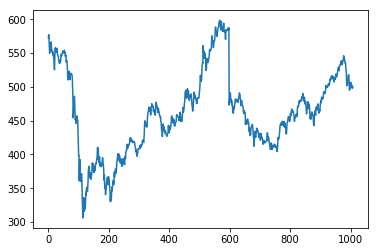

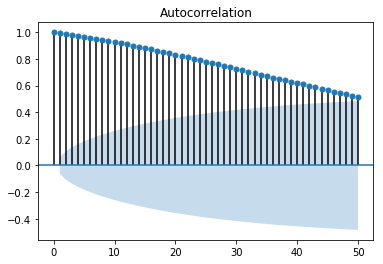

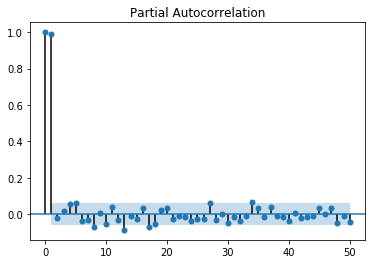

In [21]:
plt.plot(ibm_df['Close_Price'])
ibm_df['residual']=ibm_df['Close_Price']-ibm_df['Close_Price'].mean()
ibm_df=ibm_df.dropna()
t1 = tsaplots.plot_acf(ibm_df.residual, lags=50)
t2 = tsaplots.plot_pacf(ibm_df.residual, lags=50)

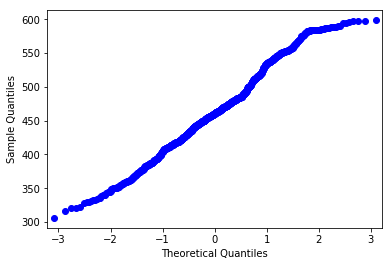

In [25]:
g0 = gofplots.qqplot(ibm_df['Close_Price'])

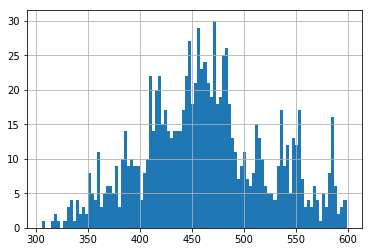

In [28]:
hist = ibm_df['Close_Price'].hist(bins=100)

In [30]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smmodel.ARMA(ibm_df.Close_Price.tolist(), order=(ari,maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])


In [31]:
aicVal

[[1, 0, 6702.766710082229],
 [1, 1, 6704.704833955866],
 [1, 2, 6706.643594202738],
 [2, 0, 6704.705792807847],
 [2, 1, 6705.736896105918],
 [2, 2, 6707.728881971867]]

In [40]:
# Building optimized model using minimum AIC
arma_obj_fin = smmodel.ARMA(ibm_df.Close_Price.tolist(), order=(1,1)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA'] = arma_obj_fin.predict()


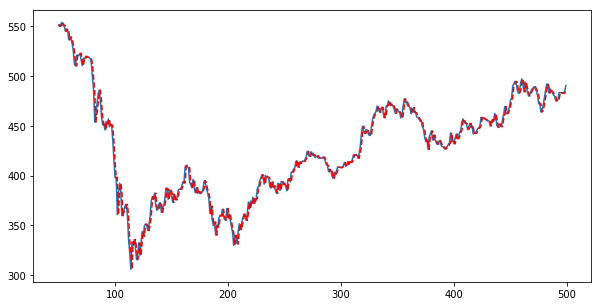

In [43]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ibm_df['Close_Price'][50:500].plot(ax=ax)
ibm_df['ARMA'][50:500].plot(ax=ax,style='r--')